In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from IPython.display import Image

warnings.filterwarnings('ignore')
%matplotlib inline

SEED = 34

In [2]:
# 데이터를 불러오는 코드를 작성해주세요.
mnist = keras.datasets.mnist
((train_images, train_labels), (test_images, test_labels)) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# 데이터의 크기를 shape 함수를 통해 출력해주세요.
print(f'train_images.shape: {train_images.shape}')
print(f'train_labels.shape: {train_labels.shape}')

print(f'test_images.shape: {test_images.shape}')
print(f'test_labels.shape: {test_labels.shape}')

train_images.shape: (60000, 28, 28)
train_labels.shape: (60000,)
test_images.shape: (10000, 28, 28)
test_labels.shape: (10000,)


5


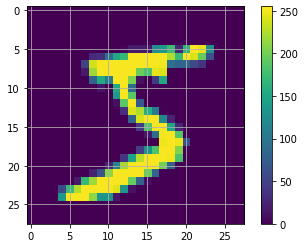

In [4]:
# 28x28의 흑백 이미지를 plt를 이용하여 출력하는 코드를 작성해보세요.
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)
plt.show
print(train_labels[0])

In [5]:
# 하나의 이미지에 대한 모든 0이 아닌 값을 출력하는 코드를 작성하세요.
list(filter(lambda x : x != 0, train_images[0].reshape(-1)))[:10] #일차원 변경



#하나의 이미지 출력 train_images[0]
#1차원으로 변경 train_images[0].reshape(-1)
#filter는 앞의 값들이 True여야지만 출력을 준다. filter(lambda x : x != 0, train_images[0].reshape(-1))
#이를 list화해서 출력
#데이터의 값들을 정렬 - sorted(list(filter(lambda x : x != 0, train_images[0].reshape(-1))))

[3, 18, 18, 18, 126, 136, 175, 26, 166, 255]

In [6]:
# dtype을 이용하여 이미지의 np array type을 확인해보세요.
train_images.dtype

dtype('uint8')

In [7]:
# test_images의 shape과 dtype, 0이 아닌 숫자를 출력하는 코드를 작성하세요.
list(filter(lambda x : x != 0,train_images[0].reshape(-1)))[:10]

[3, 18, 18, 18, 126, 136, 175, 26, 166, 255]

In [8]:
# train/test 전체 데이터에서 각 images, labels의 min, max를 출력하는 코드를 작성하세요.
max(train_images.reshape(-1))
min(train_images.reshape(-1))

0

In [9]:
# train/test 데이터의 타입을 dtype으로 확인해보고 실수형으로 전환하는 코드를 작성하세요. 
train_images.astype(np.float64).dtype
test_images.astype(np.float64).dtype

dtype('float64')

In [10]:
# images의 값이 0-1사이의 값을 같도록 코드를 작성해보세요.
train_images = train_images / 255
test_images = test_images / 255

In [11]:
# 노말라이즈 후 min/max, shape, 0이 아닌 값, dtype 등을 확인하는 코드를 작성해보세요.
print(list(filter(lambda x : x != 0,train_images[0].reshape(-1)))[:10])
print(list(filter(lambda x : x != 0,train_labels.reshape(-1)))[:10])
print(list(filter(lambda x : x != 0,test_images[0].reshape(-1)))[:10])
print(list(filter(lambda x : x != 0,test_labels.reshape(-1)))[:10])

[0.011764705882352941, 0.07058823529411765, 0.07058823529411765, 0.07058823529411765, 0.49411764705882355, 0.5333333333333333, 0.6862745098039216, 0.10196078431372549, 0.6509803921568628, 1.0]
[5, 4, 1, 9, 2, 1, 3, 1, 4, 3]
[0.32941176470588235, 0.7254901960784313, 0.6235294117647059, 0.592156862745098, 0.23529411764705882, 0.1411764705882353, 0.8705882352941177, 0.996078431372549, 0.996078431372549, 0.996078431372549]
[7, 2, 1, 4, 1, 4, 9, 5, 9, 6]


In [12]:
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)
print(train_images.dtype, train_labels.dtype, test_images.dtype, test_labels.dtype)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
float64 uint8 float64 uint8


In [13]:
# (60000, 28, 28)인 train_images에서 (5, 28, 28)을 획득하는 코드를 작성하세요.
train_images[:5].shape

(5, 28, 28)

(28, 140)


<function matplotlib.pyplot.show>

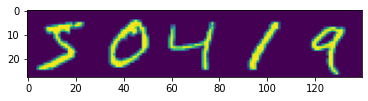

In [14]:
# np.hstack은 height 방향의 배열을 풀어서 width 방향으로 연결해줍니다.
# 해당 기능을 쓰면 (height, image_height, image_width)의 shape을 (image_height, image_width * height)으로 바꿔 줄 수 있습니다.
# 코드를 작성해보세요.
print(np.hstack(train_images[:5]).shape)
plt.imshow(np.hstack(train_images[:5]))
plt.show

In [15]:
# transpose는 tensor의 axis를 섞는 기능을 합니다.
# 해당 기능을 이용해서 (28, 140)을 작성하는 코드를 작성해보세요.
train_images[:5].transpose((1,0,2)).reshape(28,-1).shape

(28, 140)

<function matplotlib.pyplot.show>

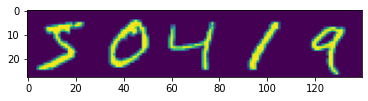

In [16]:
# (28, 140)의 이미지를 plt로 출력해보세요.
plt.imshow(np.hstack(train_images[:5]))
plt.show

plt.imshow(train_images[:5].transpose((1,0,2)).reshape(28,-1))
plt.show

<function matplotlib.pyplot.show>

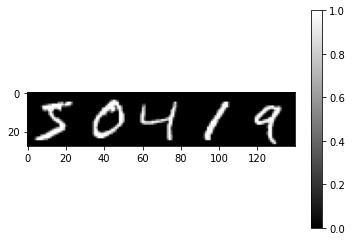

In [17]:
# images와 labels 5개를 출력하는 코드를 작성하세요.
plt.imshow(train_images[:5].transpose((1,0,2)).reshape(28,-1), cmap = 'gray')
plt.colorbar()
plt.show

In [18]:
# np.random.ranodm을 이용해서 0-1 사의의 랜덤값을 3회 출력하는 코드를 작성하시오.
print(np.random.random())
print(np.random.random())
print(np.random.random())

0.3368350243866708
0.4113841578000931
0.21718784786187617


In [19]:
# np.random.randpm 함수와 shape 파라매터를 이용하여 (28, 28)의 랜덤 노이즈를 생성하는 코드를 작성하시오.
np.random.random((28,28)).shape

(28, 28)

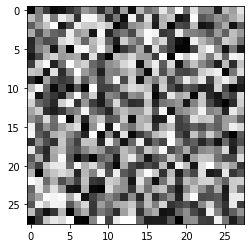

In [20]:
# plt를 통하여 random (28, 28) 노이즈를 2회 출력하는 코드를 작성하시고, 이미지가 다른지 확인하세요.
plt.imshow(np.random.random((28,28)),cmap='gray')
plt.show()

In [21]:
# 가우시안 노이즈 함수를 이용하여 mu 0.0 std 0.1 size 1인 랜덤값을 3번 출력하는 코드를 작성하세요.
print(np.random.normal(0.0,0.1,1))
print(np.random.normal(0.0,0.1,1))
print(np.random.normal(0.0,0.1,1))

[-0.00974528]
[0.12948296]
[0.01789113]


In [22]:
# 가우시안 노이즈 함수 mu = 3.0, std = 0.1, size = 1을 3 회 출력, mu = 0.0, std = 0.01, size = 1을 3회 출력하는 코드를 작성해보세요.
print(np.random.normal(3.0,0.1,1))
print(np.random.normal(3.0,0.1,1))
print(np.random.normal(3.0,0.1,1))

[2.91760077]
[2.93835532]
[2.98213938]


<function matplotlib.pyplot.show>

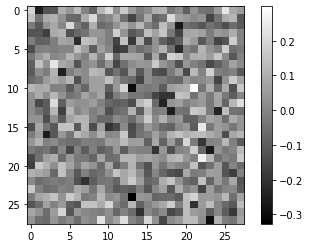

In [23]:
# 가우시안 노이즈 함수를 문제 17의 옵션으로 size를 (28, 28)로 생성 후 plt로 출력하는 코드를 작성해보세요. 단, std = 0.01
plt.imshow(np.random.normal(0.0,0.1,[28,28]), cmap='gray')
plt.colorbar()
plt.show

In [24]:
# train_images[5]와 가우시안 노이즈 (28, 28)을 더한 뒤 noisy_image 변수에 할당하는 코드를 작성하세요. mu = 0.5, std = 0.1
noisy_image = (train_images[5] + np.random.normal(0.5,0.1,[28,28]))

<function matplotlib.pyplot.show>

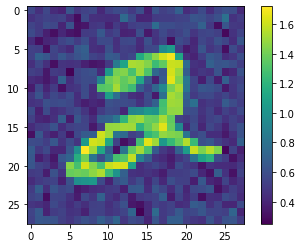

In [25]:
# noisy_image를 plt로 출력하는 코드를 작성해보세요.
plt.imshow(noisy_image)
plt.colorbar()
plt.show

<function matplotlib.pyplot.show>

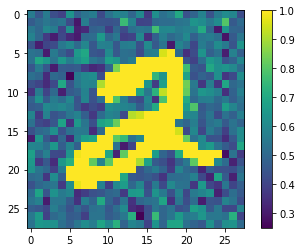

In [26]:
# max가 1을 초과하지 않게 noisy_image를 수정한 뒤 plt로 출력해보세요.
noisy_image[noisy_image> 1.0] = 1.0
plt.imshow(noisy_image)
plt.colorbar()
plt.show

In [27]:
# train_noisy_image와 test_nosiy_images를 생성하는 코드를 작성하세요.
train_noisy_images = train_images + np.random.normal(0.5,0.1,train_images.shape)
train_noisy_images[train_noisy_images>1.0] = 1.0
test_noisy_images = test_images + np.random.normal(0.5,0.1,test_images.shape)
test_noisy_images[test_noisy_images>1.0] = 1.0

<function matplotlib.pyplot.show>

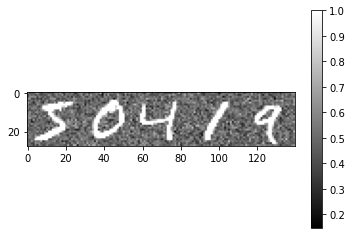

In [28]:
plt.imshow(train_noisy_images[:5].transpose((1,0,2)).reshape(28,-1), cmap = 'gray')
plt.colorbar()
plt.show

In [29]:
# train/test labels에 onehot encoding을 적용하여 shape을 (배치사이즈,) 에서 (배치사이즈, 클래스 개수)로 변경하는 코드를 작성하세요.
from tensorflow.keras.utils import to_categorical
print(train_labels.shape, test_labels.shape)
train_labels = to_categorical( train_labels, 10)  #10은 (0~9까지 있다는것을 의미)
test_labels = to_categorical( test_labels, 10)
print(train_labels.shape, test_labels.shape)

(60000,) (10000,)
(60000, 10) (10000, 10)


In [30]:
# input (28, 28), 64 unit의 simple RNN, 10 unit의 fully-conntect를 가진 모델을 작성하세요.
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.models import Model           #RNN 기본 환경

inputs = Input(shape =(28,28))
x1 = SimpleRNN(64,activation = 'tanh')(inputs)
x2 = Dense(10, activation = 'softmax')(x1)

model = Model(inputs, x2 )

In [31]:
# 모델 요약 정보를 출력해보세요.
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 64)                5952      
_________________________________________________________________
dense (Dense)                (None, 10)                650       
Total params: 6,602
Trainable params: 6,602
Non-trainable params: 0
_________________________________________________________________


In [32]:
# 만든 모델에 loss는 categorical_crossentropy, optimizer는 adam 매트릭은 accuracy으로 설정하는 코드를 작성하세요.

model.compile(loss= 'categorical_crossentropy', optimizer ='adam', metrics = ['accuracy'])

In [33]:
# train_noisy_images를 학습시키고 5 epochs을 돌리고 그 진행 사항을 hist에 저장하는 코드를 작성하세요.
hist = model.fit(train_noisy_images, train_labels, validation_data=(test_noisy_images, test_labels), epochs=5, verbose=2)

Epoch 1/5
1875/1875 - 13s - loss: 0.7095 - accuracy: 0.7724 - val_loss: 0.3568 - val_accuracy: 0.8954
Epoch 2/5
1875/1875 - 11s - loss: 0.3730 - accuracy: 0.8874 - val_loss: 0.2856 - val_accuracy: 0.9156
Epoch 3/5
1875/1875 - 11s - loss: 0.3117 - accuracy: 0.9076 - val_loss: 0.3392 - val_accuracy: 0.8917
Epoch 4/5
1875/1875 - 11s - loss: 0.2759 - accuracy: 0.9179 - val_loss: 0.2642 - val_accuracy: 0.9201
Epoch 5/5
1875/1875 - 11s - loss: 0.2515 - accuracy: 0.9257 - val_loss: 0.2305 - val_accuracy: 0.9289


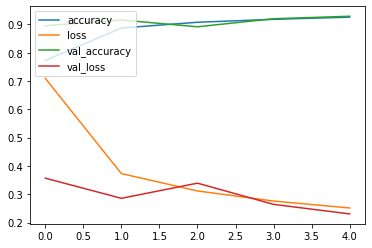

In [34]:
# hist의 accuracy plt의 plot을 이용하여 출력하는 코드를 작성하세요.
plt.plot(hist.history['accuracy'], label = 'accuracy')
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.legend(loc='upper left')
plt.show()

In [35]:
# 모델에 test_noisy_images 중 1장을 넣고 결과를 받는 코드를 작성하세요.
#test_noisy_images[0]
res = model.predict(test_noisy_images[:1])
res.shape

(1, 10)

<function matplotlib.pyplot.show>

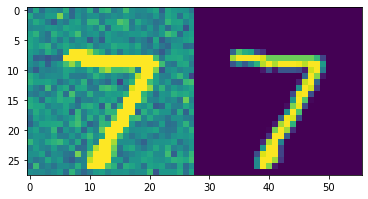

In [36]:
# test_noisy_images[0], test_images[0]를 width 방향으로 결합하여 (28, 28 * 2) 의 이미지를 만들어 plt로 출력하는 코드를 작성하세요.
plt.imshow(np.concatenate([test_noisy_images[0], test_images[0]], axis = 1))
plt.show

<function matplotlib.pyplot.show>

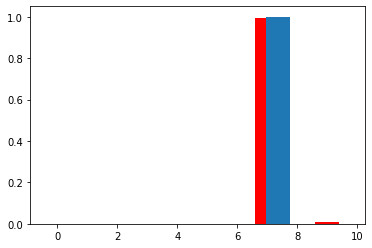

In [45]:
# res와 test_labels[0]의 결과를 plt.bar로 확인하세요.
plt.bar(range(10), res[0], color ='red')
plt.bar(np.array(range(10)) +0.35, test_labels[0])
plt.show